In [22]:

import PyAnalyse as pa #Script PyAnalyse.py must be in same folder as this .ipynb file
import matplotlib.pyplot as plt #For plotting
import csv
import datetime
import inspect, re
import os
rootdir = r'C:\Users\bhaydon\OneDrive - LA TROBE UNIVERSITY\Documents\Beer_Berry_testing\08022021\1.2mM_wash_once_only'#Add the full location of folder where your data is e.g C:\Users\blair\OneDrive - LA TROBE UNIVERSITY (1)\Documents\Beer_Berry_testing\02022021
import os.path

# For a single file

In [ ]:
sample = pa.analyse('FeCOOH_0_2mM_S1.csv') #File to analyse, 

### Variables that can be changed
sample.freq_pert = 140;                # Frequency perturbation 
sample.sec_har_bw = 10;               # Band-width window 
sample.lpf_bw = 10;                   # env lpf bandwidth
sample.har_num = 2;                   # harmonic to use (normally 2)

sample.blank_samples = 8000;          # set first samples to zero

sample.max_time = 1.5;                # Maximum time
sample.max_width = 0.2;                 

sample.sample_rate = 8000.0;          # sample rate
####

x,y,ienv_filtered = sample.analyse() #PyAnalyse returns two values, x for time, y for current
ienv = ienv_filtered

plt.plot(x,y)
plt.show()

print(max(ienv[0:32800]), max(ienv[32800:72000])) #These crudely give the two absolute max peak heights

# For a whole folder of files

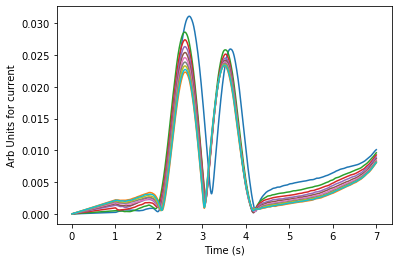

In [23]:
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        file = os.path.join(rootdir, file)
        if file.endswith(("testing.csv")): # Skips results file
            pass
        
        elif file.endswith((".csv")): #Acts on all files ending with .csv, can be changed to .data
                    ### Variables that can be changed
                    sample = pa.analyse(file)
                    sample.freq_pert = 140;                # Frequency perturbation 
                    sample.sec_har_bw = 10;               # Band-width window 
                    sample.lpf_bw = 10;                   # env lpf bandwidth
                    sample.har_num = 2;                   # harmonic to use (normally 2)

                    sample.blank_samples = 8000;          # set first samples to zero

                    sample.max_time = 1.5;                # Maximum time
                    sample.max_width = 0.2;                 

                    sample.sample_rate = 8000.0;          # sample rate
                    ####

                    x,y,ienv_filtered = sample.analyse() #PyAnalyse returns two values, x for time, y for current
                    ienv = ienv_filtered
                    date = datetime.datetime.now().strftime("%Y_%m_%d_%H_%M")
                    with open(str(date)+'1.2mM_FeCOOH_10_runs_2_sec_between_no_additional_wash.csv', mode='a', newline='') as ferrocene_file:
                         ferrocene_writer = csv.writer(ferrocene_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

                         ferrocene_writer.writerow([str(sample.filename),max(ienv[0:32800]), max(ienv[32800:72000]) ])  

                    #plt.legend(loc='upper right', fontsize=8)
                    plt.plot(x,y, label=sample.filename)
                    plt.xlabel('Time (s)') #Can change as desired
                    plt.ylabel('Arb Units for current') #Can change as desired
plt.savefig(str(date)+'1.2mM_FeCOOH_10_runs_2_sec_between_no_additional_wash.png', dpi=500) 
plt.show()
                
       

In [12]:
for file in ['2mM_FeCOOH_S2_Run_1.csv','2mM_FeCOOH_S2_Run_2.csv','2mM_FeCOOH_S2_Run_3.csv','2mM_FeCOOH_S2_Run_4.csv','2mM_FeCOOH_S2_Run_5.csv']:


### Variables that can be changed
    sample = pa.analyse(file)
    sample.freq_pert = 140;                # Frequency perturbation 
    sample.sec_har_bw = 10;               # Band-width window 
    sample.lpf_bw = 10;                   # env lpf bandwidth
    sample.har_num = 2;                   # harmonic to use (normally 2)

    sample.blank_samples = 8000;          # set first samples to zero

    sample.max_time = 1.5;                # Maximum time
    sample.max_width = 0.2;                 

    sample.sample_rate = 8000.0;          # sample rate
    ####

    x,y,ienv_filtered = sample.analyse() #PyAnalyse returns two values, x for time, y for current
    ienv = ienv_filtered
    date = datetime.datetime.now().strftime("%Y_%m_%d_%H_%M")
    with open(str(date)+'_ferrocene_data.csv', mode='a', newline='') as ferrocene_file:
         ferrocene_writer = csv.writer(ferrocene_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

         ferrocene_writer.writerow([str(sample.filename),max(ienv[0:32800]), max(ienv[32800:72000]) ])  

    plt.legend(loc='upper right', fontsize=8)
    plt.plot(x,y, label=sample.filename)
    plt.xlabel('Time (s)') #Can change as desired
    plt.ylabel('Arb Units for current') #Can change as desired
plt.savefig(str(date)+'_FeCOOH_testing.png', dpi=500) 
plt.show()

FileNotFoundError: [Errno 2] File 2mM_FeCOOH_S2_Run_1.csv does not exist: '2mM_FeCOOH_S2_Run_1.csv'